# Simulations of the compartmental system as depicted in the internship report
## Using the perinuclear crown as a biomarker 

In [8]:
from compartmental.Simulation import Simulation

four_monthes_duration = 24 * 30 * 4  # in hours
time_step = 1 / 60  # in hours

sim_biomarker = Simulation(four_monthes_duration, time_step)

dimers_production = lamdA = 15
dimers_degradation = d0 = 0.05
monomers_degradation_in_nucleus = d1 = 0.3
coefs_dimer_formation_cytoplasm = a1, e1 = 0.1, 20
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2 = 400, 0.4, 15, 20
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3 = 80, 0.5, 5, 0.5, 1
coefs_complex_formation = a4, e4 = 0.05, 20
coefs_dimer_formation_crown = a5, b5, n5, e5 = 0.4, 150, 15, 20
e6 = 0.5
coefs_fragmentation = cs, e0 = 0.002, 20

initial_compartments_no_crown = (300, 0, 0, 0, 200, 0, 0)

sim_biomarker.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                    initial_compartments_no_crown)

times_antioxidant = ()
dose_antioxidant = 0.15
times_irradiation = ()
dose_irradiation = 15
times_statin = ()
dose_statin = 5

sim_biomarker.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                    times_statin, dose_statin)

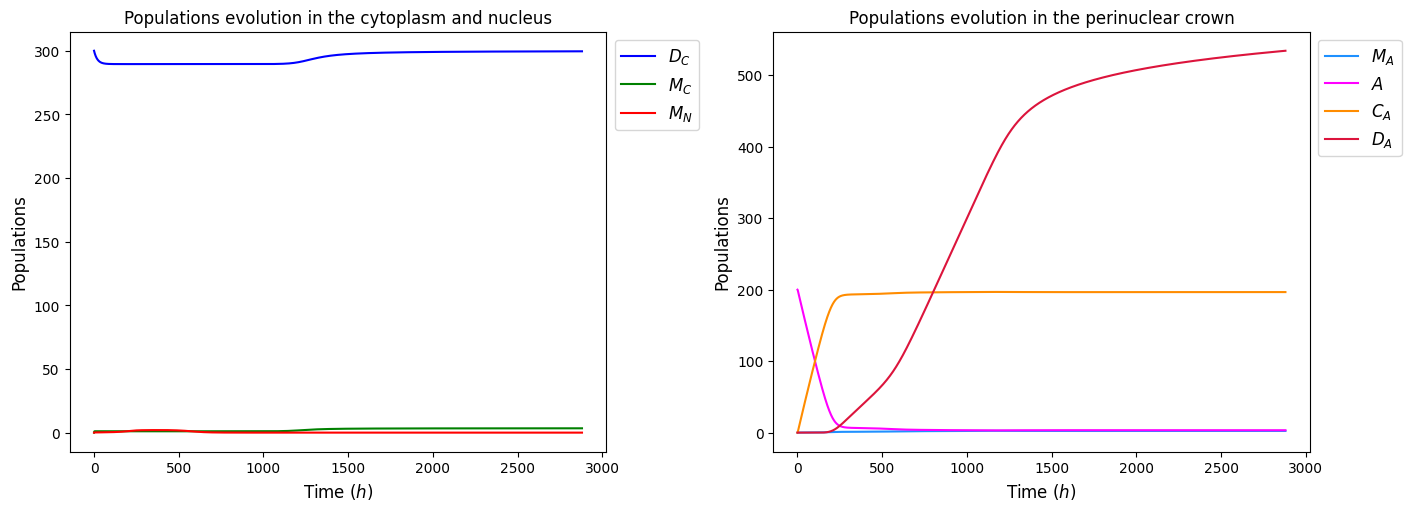

In [9]:
sim_biomarker.simulate()

sim_biomarker.plot_all_compartments()

## Kinetic of the perinuclear crown
### Crown formation speed along time

In [24]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

def initialize_simulation(sim: Simulation):    
    sim.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                   coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                   coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                   initial_compartments_no_crown)
    
    sim.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                      times_statin, dose_statin)
    

def plot_crown_formation_speed_along_rate(crown_formation_speeds: ndarray, rates: ndarray, rate_name: str):
    plt.plot(rates, crown_formation_speeds)
    plt.xscale("log")
    plt.xlabel(rate_name, fontsize=12)
    plt.ylabel("Crown formation speed ($h^{-1}$)", fontsize=12)
    plt.show()

In [50]:
print(f"Reference value of the crown formation speed at time 400: {sim_biomarker.crown_formation_speed[400 * 60]:.3g}")

Reference value of the crown formation speed at time 400: 0.00369


### Impact of $a_1$

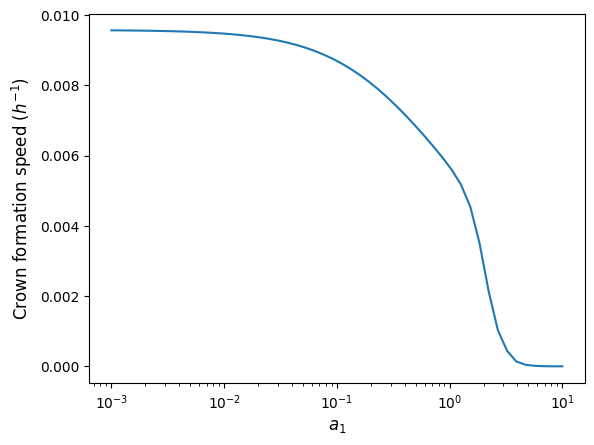

In [26]:
duration_kinetic = 400  # in hours

a1_array = a1 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(a1_array.shape)

for index, a1_new in enumerate(a1_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_dimer_formation_cytoplasm = a1_new, e1
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_dimer_formation_cytoplasm = a1, e1  # resetting the coefficients
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, a1_array, "$a_1$")

### Impact of $a_2$

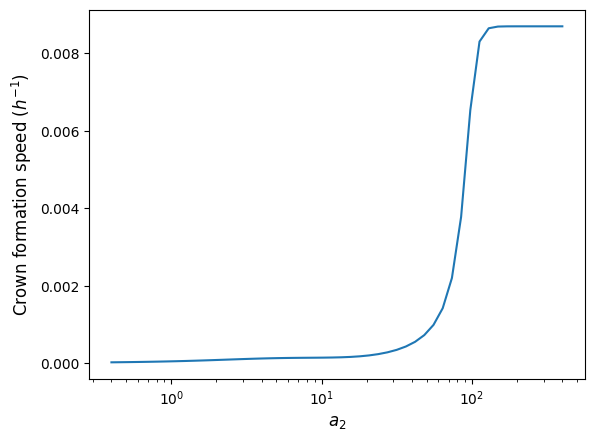

In [27]:
a2_array = a2 * np.logspace(-3, 0, 50)

crown_formation_speeds = np.zeros(a2_array.shape)

for index, a2_new in enumerate(a2_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_cytoplasm_to_crown = a2_new, b2, n2, e2
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, a2_array, "$a_2$")

### Impact of $b_2$

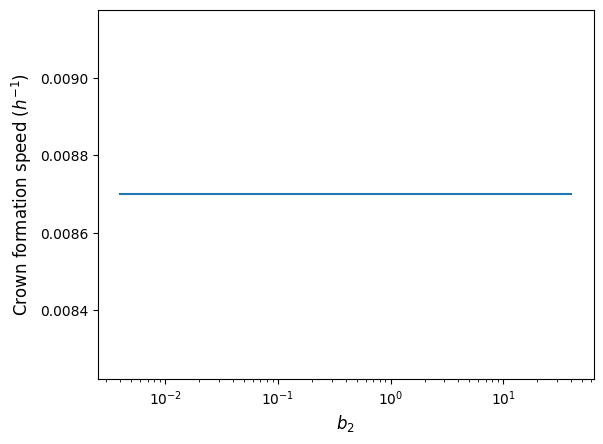

In [28]:
b2_array = b2 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(b2_array.shape)

for index, b2_new in enumerate(b2_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_cytoplasm_to_crown = a2, b2_new, n2, e2
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, b2_array, "$b_2$")

### Impact of $n_2$

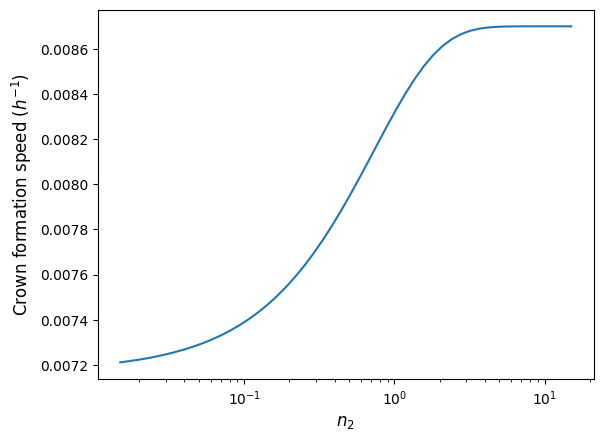

In [30]:
n2_array = n2 * np.logspace(-3, 0, 50)

crown_formation_speeds = np.zeros(n2_array.shape)

for index, n2_new in enumerate(n2_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_cytoplasm_to_crown = a2, b2, n2_new, e2
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, n2_array, "$n_2$")

### Impact of a3

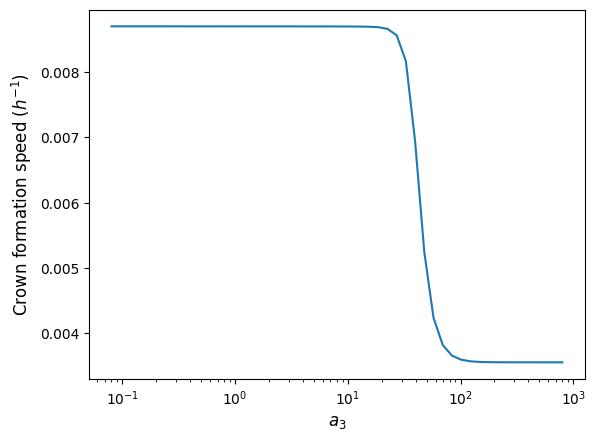

In [31]:
a3_array = a3 * np.logspace(-3, 1, 50)

crown_formation_speeds = np.zeros(a3_array.shape)

for index, a3_new in enumerate(a3_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_crown_to_nucleus = a3_new, b3, n3, e3, f3
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, a3_array, "$a_3$")

### Impact of b3

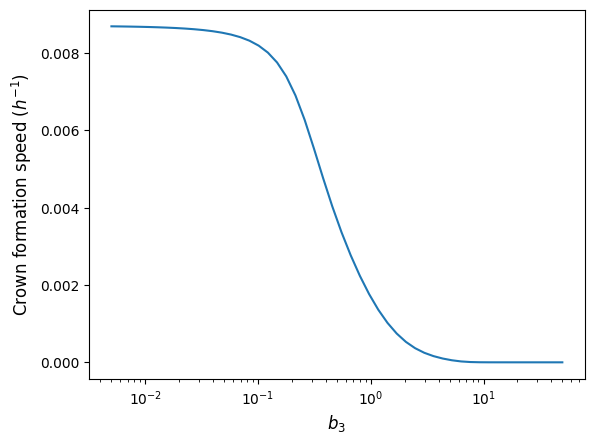

In [32]:
b3_array = b3 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(b3_array.shape)

for index, b3_new in enumerate(b3_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_crown_to_nucleus = a3, b3_new, n3, e3, f3
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, b3_array, "$b_3$")

### Impact of n3

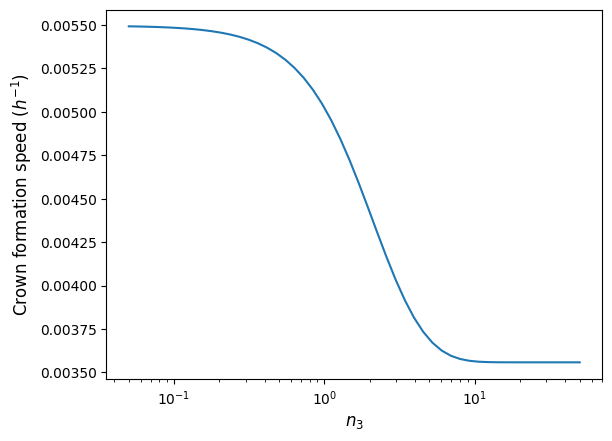

In [34]:
n3_array = n3 * np.logspace(-2, 1, 50)

crown_formation_speeds = np.zeros(n3_array.shape)

for index, n3_new in enumerate(n3_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_migration_crown_to_nucleus = a3, b3, n3_new, e3, f3
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, n3_array, "$n_3$")

### Impact of $a_4$

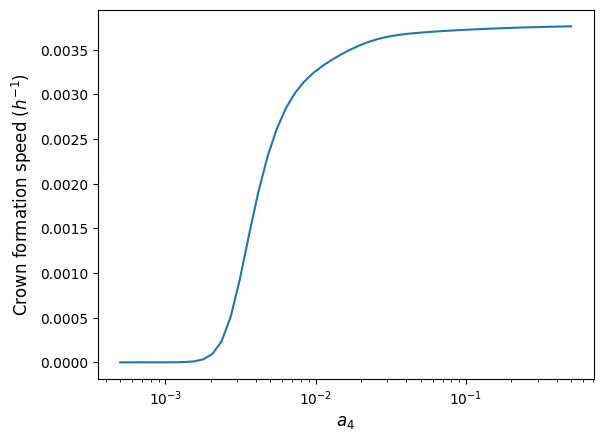

In [36]:
a4_array = a4 * np.logspace(-2, 1, 50)

crown_formation_speeds = np.zeros(a4_array.shape)

for index, a4_new in enumerate(a4_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_complex_formation = a4_new, e4
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_complex_formation = a4, e4
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, a4_array, "$a_4$")

### Impact of $a_5$

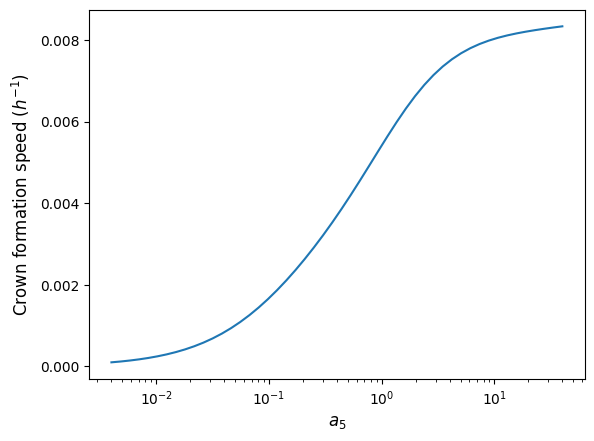

In [37]:
a5_array = a5 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(a5_array.shape)

for index, a5_new in enumerate(a5_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_dimer_formation_crown = a5_new, b5, n5, e5
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_dimer_formation_crown = a5, b5, n5, e5
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, a5_array, "$a_5$")

### Impact of $b_5$

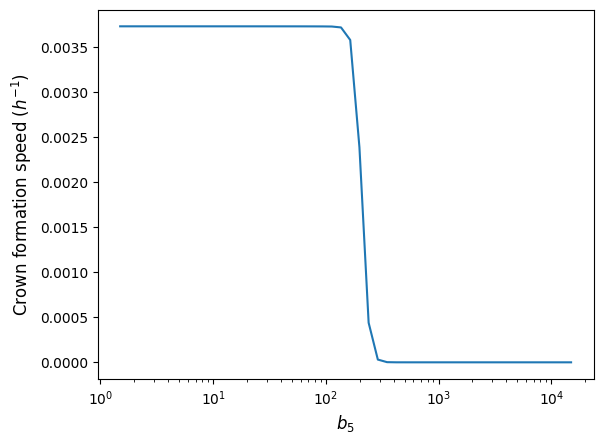

In [38]:
b5_array = b5 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(b5_array.shape)

for index, b5_new in enumerate(b5_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_dimer_formation_crown = a5, b5_new, n5, e5
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_dimer_formation_crown = a5, b5, n5, e5
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, b5_array, "$b_5$")

### Imapct of $n_5$

/home/sbure/Documents/ALZHEIMER/CODES/compartmental/Rate.py:132: RuntimeWarning: overflow encountered in scalar power
  return (self.a * compartment ** self.n) / ((self.b ** self.n + compartment ** self.n)
/home/sbure/Documents/ALZHEIMER/CODES/compartmental/Rate.py:132: RuntimeWarning: invalid value encountered in scalar divide
  return (self.a * compartment ** self.n) / ((self.b ** self.n + compartment ** self.n)


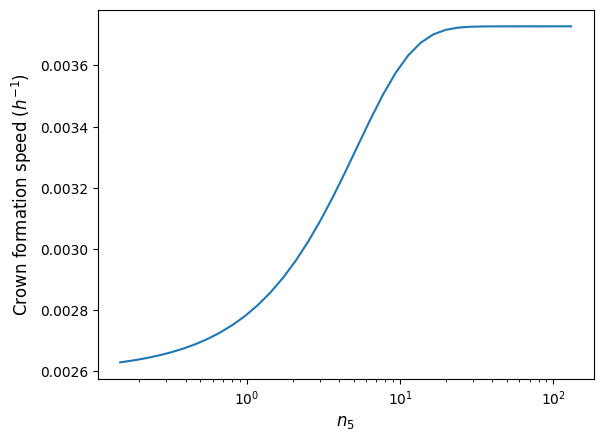

In [39]:
n5_array = n5 * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(n5_array.shape)

for index, n5_new in enumerate(n5_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_dimer_formation_crown = a5, b5, n5_new, e5
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_dimer_formation_crown = a5, b5, n5, e5
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, n5_array, "$n_5$")

### Impact of $c_s$

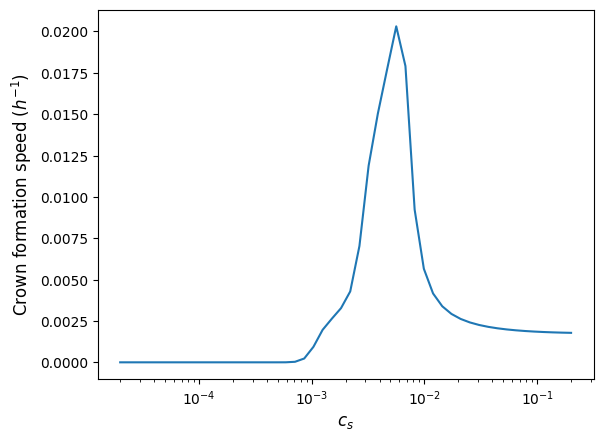

In [40]:
cs_array = cs * np.logspace(-2, 2, 50)

crown_formation_speeds = np.zeros(cs_array.shape)

for index, cs_new in enumerate(cs_array):
    sim = Simulation(duration_kinetic, time_step)
    
    coefs_fragmentation = cs_new, e0
    
    initialize_simulation(sim)
    
    sim.simulate()
    
    crown_formation_speeds[index] = sim.crown_formation_speed[-1]
    
coefs_fragmentation = cs_new, e0
    
plot_crown_formation_speed_along_rate(crown_formation_speeds, cs_array, "$c_s$")

## Investigating therapeutics strategies to destroy the perinuclear crown
### Effect of an irradiation on the perinuclear crown

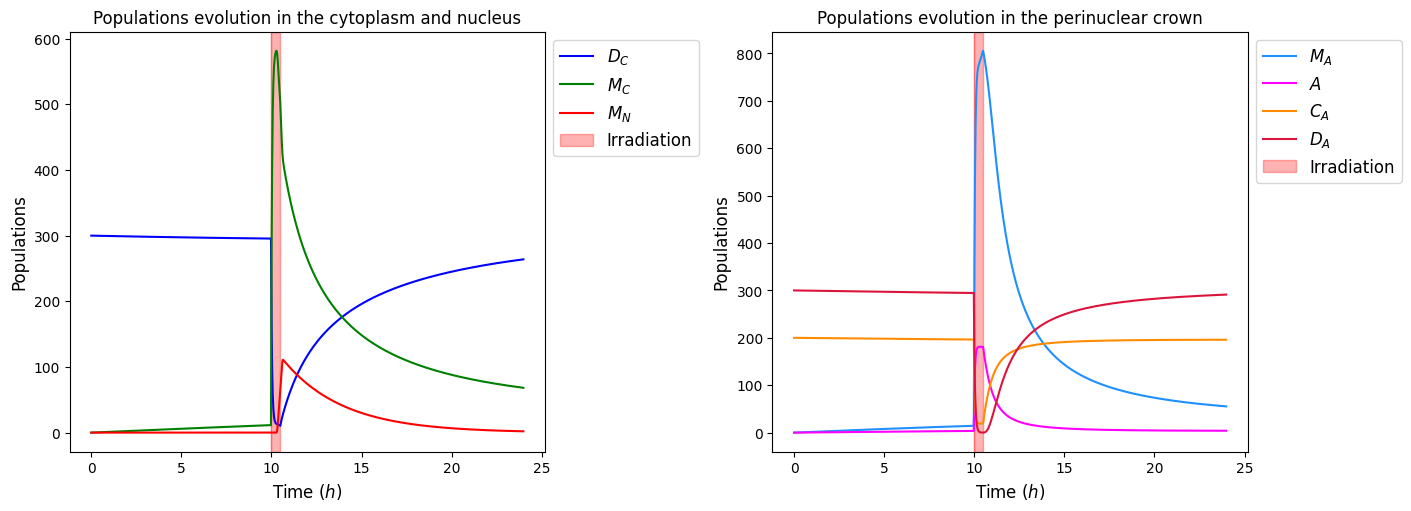

In [7]:
a_day_duration = 24  # in hours

sim_irradiation = Simulation(a_day_duration, time_step)

coefs_dimer_formation_cytoplasm = a1, a2 = 0.001, 20
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2 = 1, 0.4, 3, 20
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3 = 1, 0.5, 5, 0.5, 1
coefs_complex_formation = a4, e4 = 0.002, 20
coefs_dimer_formation_crown = a5, b5, n5, e5 = 0.002, 150, 3, 20
e6 = 0.5
coefs_fragmentation = cs, e0 = 0.002, 20

initial_compartments_crown_formed = (300, 0, 0, 0, 0, 200, 300)

sim_irradiation.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                    initial_compartments_crown_formed)

times_irradiation = (10, 10.5)

sim_irradiation.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                    times_statin, dose_statin)

sim_irradiation.simulate()

sim_irradiation.plot_all_compartments()

### Effect of antioxidant on the formation of the crown

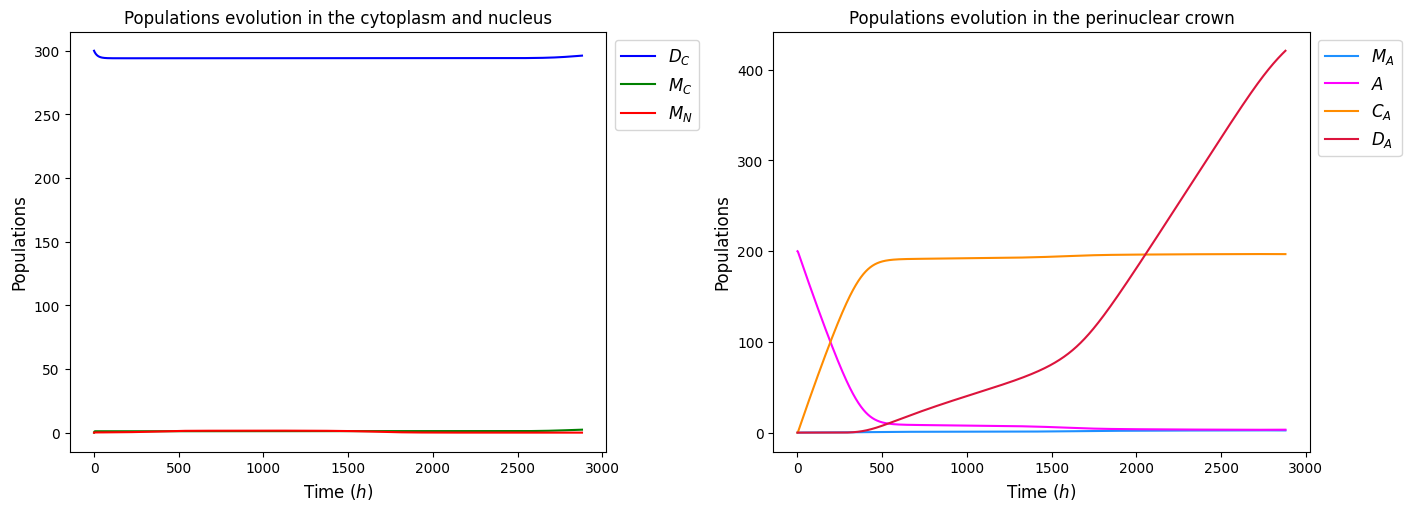

In [62]:
sim_aox = Simulation(four_monthes_duration, time_step)

coefs_dimer_formation_cytoplasm = a1, e1 = 0.1, 20
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2 = 400, 0.4, 15, 20
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3 = 80, 0.5, 5, 0.5, 1
coefs_complex_formation = a4, e4 = 0.05, 20
coefs_dimer_formation_crown = a5, b5, n5, e5 = 0.4, 150, 15, 20
e6 = 0.5
coefs_fragmentation = cs, e0 = 0.002, 20

sim_aox.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                    initial_compartments_no_crown)

times_antioxidant = (0, four_monthes_duration)
dose_antioxidant = 0.04
times_irradiation = ()

sim_aox.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                    times_statin, dose_statin)

sim_aox.simulate()

sim_aox.plot_all_compartments()

### Effect of antioxidant on an already-formed perinuclear crown

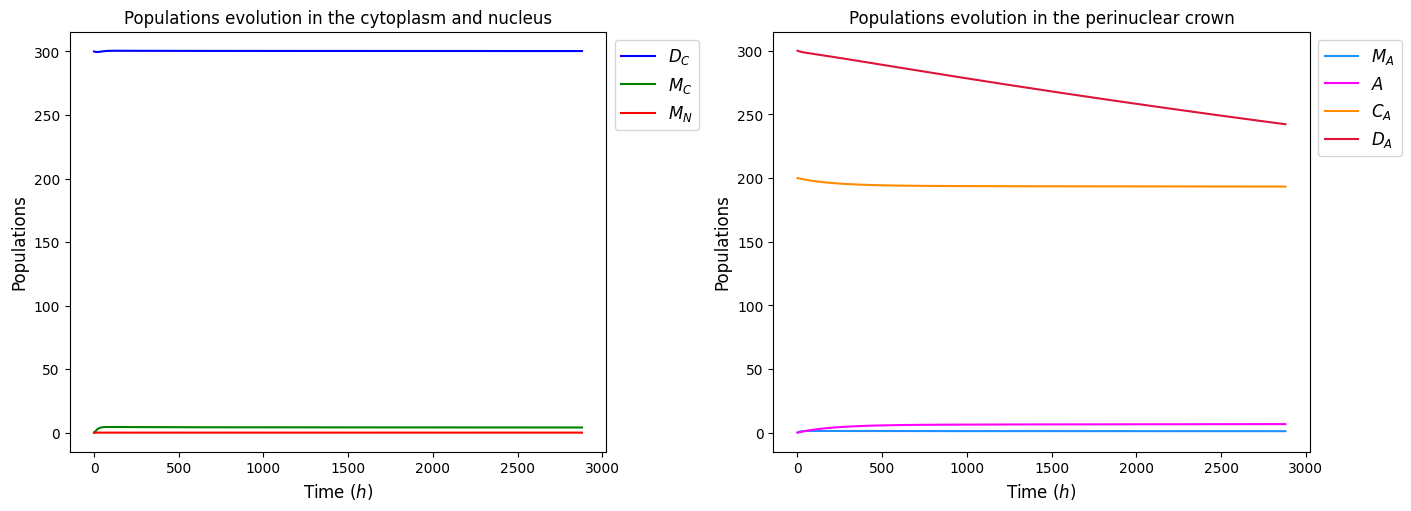

In [65]:
sim_aox_formed = Simulation(four_monthes_duration, time_step)

initial_compartments_crown_formed = (300, 0, 0, 0, 0, 200, 300)

sim_aox_formed.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation, 
                                    initial_compartments_crown_formed)

times_antioxidant = (0, four_monthes_duration)
dose_antioxidant = 0.6

sim_aox_formed.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                      times_statin, dose_statin)

sim_aox_formed.simulate()

sim_aox_formed.plot_all_compartments()

### Combined effects of irradiation and antioxidant and statin.